In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Import data into Python environment.

In [2]:
comcast_data = pd.read_csv("Dataset/Comcast_telecom_complaints_data.csv")

In [3]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
comcast_data.duplicated().sum()

0

#### Task 1.1: Exploring the Dataset

In [6]:
comcast_data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [7]:
comcast_data['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [9]:
comcast_data['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [24]:
top_15_city_max_complains = comcast_data['City'].value_counts()[:15]
top_15_city_min_complains = comcast_data['City'].value_counts(ascending = True)[:15]

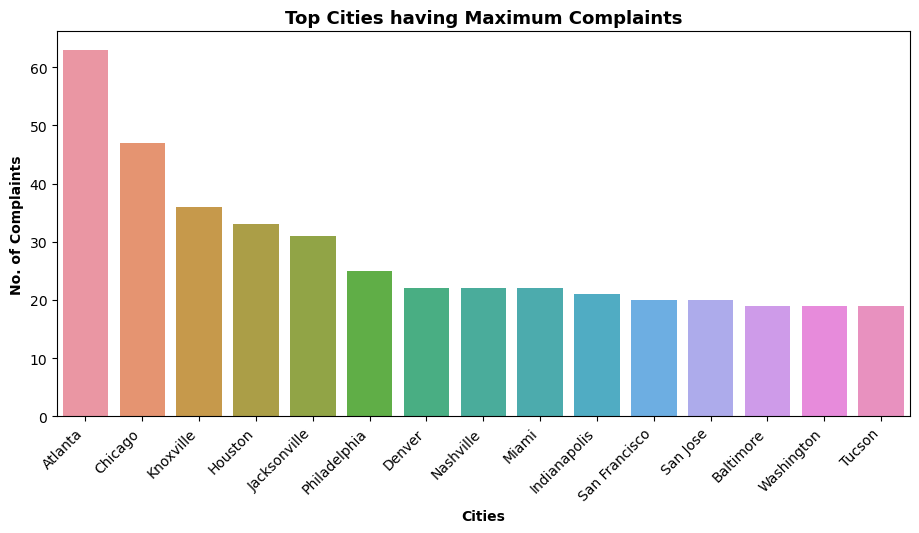

In [21]:
plt.figure(figsize=(11,5))
ax = sns.barplot(x = top_15_city_max_complains.index, y = top_15_city_max_complains.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.title('Top Cities having Maximum Complaints', fontsize = 13, fontweight="bold")
plt.xlabel('Cities', fontweight="bold")
plt.ylabel('No. of Complaints', fontweight="bold");

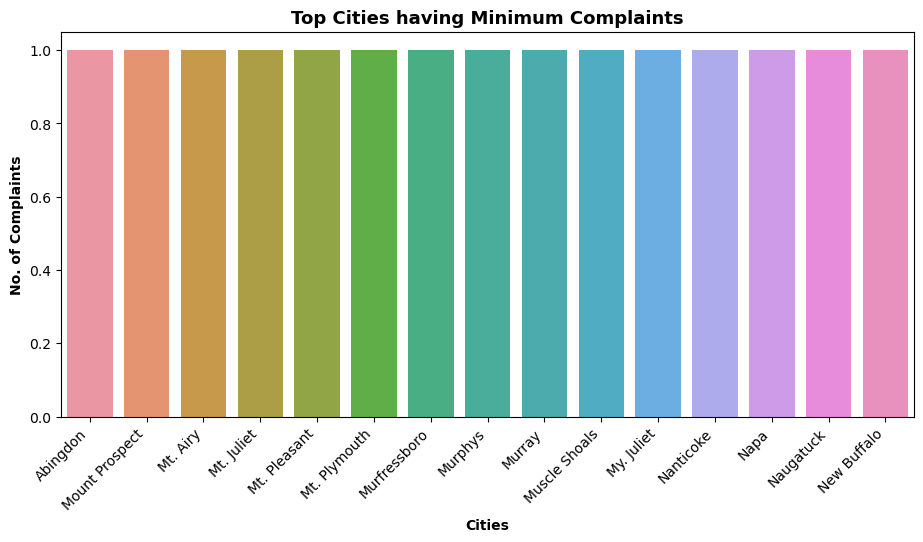

In [25]:
plt.figure(figsize=(11,5))
ax = sns.barplot(x = top_15_city_min_complains.index, y = top_15_city_min_complains.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.title('Top Cities having Minimum Complaints', fontsize = 13, fontweight="bold")
plt.xlabel('Cities', fontweight="bold")
plt.ylabel('No. of Complaints', fontweight="bold");

In [27]:
top_15_state_max_complains = comcast_data['State'].value_counts()[:15]
top_15_state_min_complains = comcast_data['State'].value_counts(ascending = True)[:15]

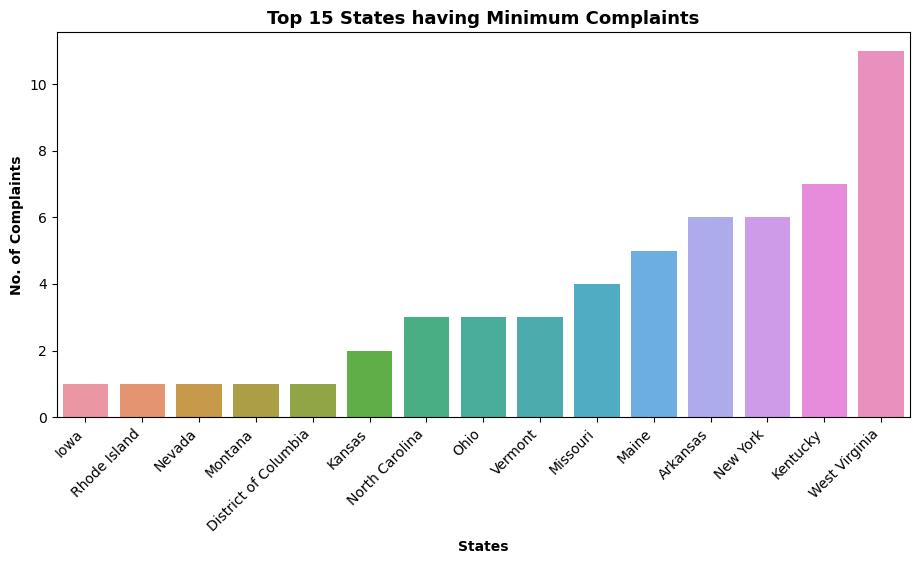

In [29]:
plt.figure(figsize=(11,5))
ax = sns.barplot(x = top_15_state_min_complains.index, y = top_15_state_min_complains.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 States having Minimum Complaints', fontsize = 13, fontweight="bold")
plt.xlabel('States', fontweight="bold")
plt.ylabel('No. of Complaints', fontweight="bold");

In [ ]:
plt.figure(figsize=(11,5))
ax = sns.barplot(x = top_15_state_max_complains.index, y = top_15_state_max_complains.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 States having Maximum Complaints', fontsize = 13, fontweight="bold")
plt.xlabel('States', fontweight="bold")
plt.ylabel('No. of Complaints', fontweight="bold");

In [30]:
comcast_data['Zip code'].nunique()

1543

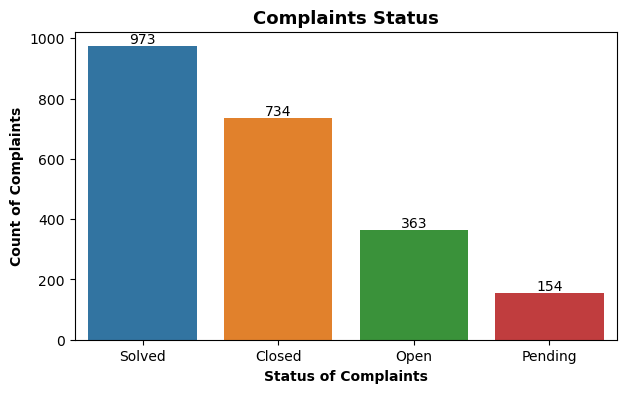

In [35]:
plt.figure(figsize=(7,4))
ax = sns.barplot(x = comcast_data['Status'].value_counts().index, y = comcast_data['Status'].value_counts().values)
ax.bar_label(ax.containers[0])
plt.title('Complaints Status', fontsize = 13, fontweight="bold")
plt.xlabel('Status of Complaints', fontweight="bold")
plt.ylabel('Count of Complaints', fontweight="bold");

In [38]:
compaint_received_by = comcast_data['Filing on Behalf of Someone'].value_counts()
compaint_received_by

No     2021
Yes     203
Name: Filing on Behalf of Someone, dtype: int64

In [40]:
compaint_received_by.index = ['Self', 'Filed on someone\'s behalf']
compaint_received_by

Self                         2021
Filed on someone's behalf     203
Name: Filing on Behalf of Someone, dtype: int64

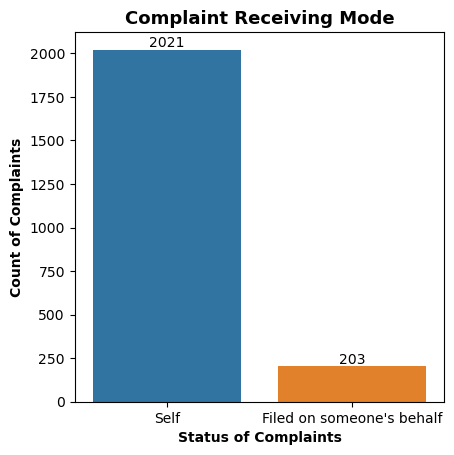

In [62]:
ax = sns.barplot(x = compaint_received_by.index, y = compaint_received_by.values)
ax.set_box_aspect(2/len(ax.patches)) #change 10 to modify the y/x axis ratio
ax.bar_label(ax.containers[0])
plt.title('Complaint Receiving Mode', fontsize = 13, fontweight="bold")
plt.xlabel('Status of Complaints', fontweight="bold")
plt.ylabel('Count of Complaints', fontweight="bold");

### Task 2: Provide the trend chart for the number of complaints at monthly and daily granularity levels.